## ARIMA method

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()


'E:\\Python WD\\time_series\\source'

#### Reading dataset

In [2]:
df= pd.read_csv("E:/Python WD/time_series/data/Work Data - Sheet1.csv")


#### Defining parameters for time series analysis

In [3]:
#define columns
df.columns
time_series_index= 'obs'
forecast_variable= 'FTCORTCS'
additional_variables= ['EEA', 'UYCD', 'FNNF', 'FYPTY', 'JGDPMTPR', 'UFCORPTS',
       'UFSNPEPS', 'YPPROPADJNF', 'ZB']

frequency= 'Q'
forecast_points= 8
n_test= 8 #quarters
output_length= 8


#### Preparing data as per specified parameters

In [4]:
#set datetime index column
df[time_series_index]= pd.to_datetime(df[time_series_index])
df= df.set_index(time_series_index)
df_complete= df
df= df[df.index<='2019Q3']

#bring forecast variable column at index 0 
df= pd.concat([df[[forecast_variable]],df.drop(columns=forecast_variable)], axis=1)

#### Train test split

In [5]:
n_test= n_test # 8 quarters in test data<-- make it 0 to forecast
n_train= df.shape[0]-n_test

train_df= df[:n_train]
test_df= df[-n_test:]




output_length= output_length
#train length: taking train
train_length= round(1.5*output_length)

#### Visualizing the data

Text(0.5, 1.0, 'plot of 3 year rolling mean')

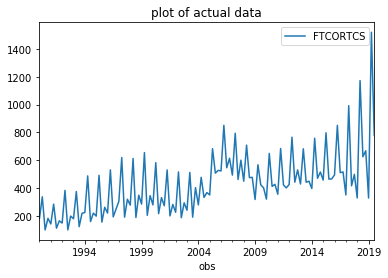

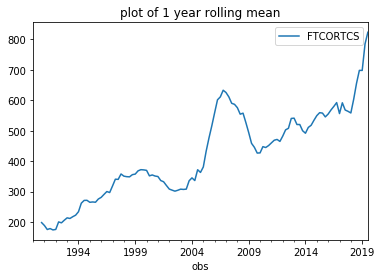

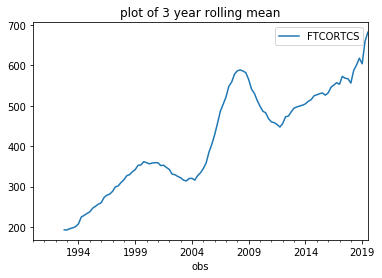

In [6]:
df[[forecast_variable]].plot()
plt.title('plot of actual data')

df[[forecast_variable]].rolling(4).mean().plot()
plt.title('plot of 1 year rolling mean')
df[[forecast_variable]].rolling(12).mean().plot()
plt.title('plot of 3 year rolling mean')


#### Model fitting

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import pmdarima as pm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



# using pyramid arima version of arima
model = pm.auto_arima(train_df[forecast_variable], m= output_length, trace=True, suppress_warnings=True)

model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[8] intercept   : AIC=1169.557, Time=0.95 sec
 ARIMA(0,0,0)(0,1,0)[8] intercept   : AIC=1236.665, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[8] intercept   : AIC=1184.297, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[8] intercept   : AIC=1199.900, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[8]             : AIC=1244.319, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[8] intercept   : AIC=1168.990, Time=0.68 sec
 ARIMA(2,0,2)(0,1,0)[8] intercept   : AIC=1155.938, Time=0.44 sec
 ARIMA(2,0,2)(1,1,0)[8] intercept   : AIC=1172.188, Time=0.56 sec
 ARIMA(1,0,2)(0,1,0)[8] intercept   : AIC=1168.259, Time=0.20 sec
 ARIMA(2,0,1)(0,1,0)[8] intercept   : AIC=1178.084, Time=0.20 sec
 ARIMA(3,0,2)(0,1,0)[8] intercept   : AIC=1156.867, Time=0.63 sec
 ARIMA(2,0,3)(0,1,0)[8] intercept   : AIC=1156.596, Time=0.39 sec
 ARIMA(1,0,1)(0,1,0)[8] intercept   : AIC=1179.803, Time=0.18 sec
 ARIMA(1,0,3)(0,1,0)[8] intercept   : AIC=1157.783, Time=0.30 sec
 ARIMA(3,0,1)(0,1,0)[8] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  111
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 8)   Log Likelihood                -572.622
Date:                            Sat, 24 Oct 2020   AIC                           1155.245
Time:                                    22:48:06   BIC                           1168.418
Sample:                                         0   HQIC                          1160.581
                                            - 111                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3927      0.095     14.661      0.000       1.207       1.579
ar.L2         -0.5202      0.092     -5.637      0.000      -0.701      -0.339
ma.L1         -1.3108      0.070    -18.860      0.000      -1.447      -1.175
ma.L2          0.8671      0.058     14.987      0.000       0.754       0.981
sigma2      3835.5303    442.990      8.658      0.000    2967.285    4703.775
===================================================================================
Ljung-Box (Q):                       42.64   Jarque-Bera (JB):                13.70
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             0.43
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predicting output from fitted model

In [8]:
forecasts, ci = model.predict(output_length, return_conf_int= True)  # predict N steps into the future
forecasts= pd.DataFrame(forecasts)
forecasts.index= pd.date_range(start='10/01/2017', periods=8, freq='QS')

#### Visualizing predictions

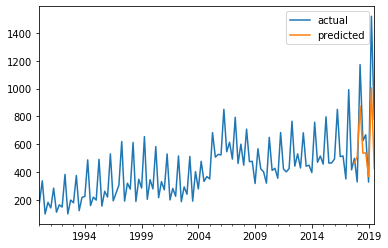

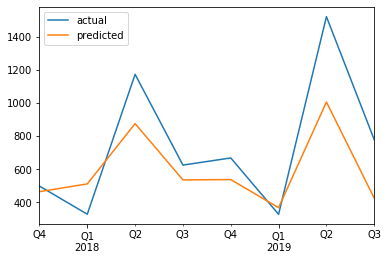

In [20]:
actual_predicted_df= df[df.index<='2019-09-30'][[forecast_variable]]
actual_predicted_df= pd.merge(actual_predicted_df,forecasts, how='outer',left_index =True, right_index=True )
actual_predicted_df= actual_predicted_df.rename(columns= {forecast_variable:'actual',0:'predicted'})
actual_predicted_df_wide= actual_predicted_df.melt( value_vars=['actual','predicted'], var_name='actual/predicted', value_name='value' )
actual_predicted_df.plot()
actual_predicted_df[actual_predicted_df.index>='2017Q4'].plot()
#plt.axvline(30, color='red')


#### Computing performance

In [22]:
#uncomment this code for first time to create a file for storing metrics
#metrics= pd.DataFrame()
#metrics.loc['mean squared error', 'ARIMA']= 1 
#metrics.to_csv('E:/Python WD/time_series/data/metrics.csv')


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import math
metrics= pd.read_csv('E:/Python WD/time_series/data/metrics.csv', index_col='Unnamed: 0')
print('mean absolute error')
metrics.loc['mean absolute error', 'ARIMA']= mean_absolute_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted)
print('mean squared error')
metrics.loc['mean squared error', 'ARIMA']= math.sqrt(mean_squared_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted))
metrics.to_csv('E:/Python WD/time_series/data/metrics.csv')


mean absolute error
mean squared error


#### Predicting next 10 years data

In [41]:
model = pm.auto_arima(df[forecast_variable], m= output_length, trace=True, suppress_warnings=True)
prediction_length= 40
forecasts, ci = model.predict(prediction_length, return_conf_int= True)  # predict N steps into the future
forecasts= pd.DataFrame(forecasts)
forecasts.index=pd.period_range(start='2019Q4', periods=prediction_length, freq='Q')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[8] intercept   : AIC=1325.668, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[8] intercept   : AIC=1370.807, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[8] intercept   : AIC=1345.383, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[8] intercept   : AIC=1357.940, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[8]             : AIC=1381.582, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[8] intercept   : AIC=1324.324, Time=0.69 sec
 ARIMA(2,0,2)(0,1,0)[8] intercept   : AIC=1324.906, Time=0.24 sec
 ARIMA(2,0,2)(0,1,2)[8] intercept   : AIC=1325.913, Time=1.70 sec
 ARIMA(2,0,2)(1,1,0)[8] intercept   : AIC=1324.012, Time=0.71 sec
 ARIMA(2,0,2)(2,1,0)[8] intercept   : AIC=1325.769, Time=0.98 sec
 ARIMA(2,0,2)(2,1,1)[8] intercept   : AIC=1327.731, Time=1.54 sec
 ARIMA(1,0,2)(1,1,0)[8] intercept   : AIC=1316.573, Time=0.69 sec
 ARIMA(1,0,2)(0,1,0)[8] intercept   : AIC=1314.692, Time=0.31 sec
 ARIMA(1,0,2)(0,1,1)[8] intercept   : AIC=1316.567, Time=0.60 sec
 ARIMA(1,0,2)(1,1,1)[8] intercept

In [60]:
#only uncomment for the first time to create predictions.csv file for storing predictions
#predictions= pd.DataFrame(index= forecasts.index)
#predictions.to_csv('E:/Python WD/time_series/data/predictions.csv')

predictions= pd.read_csv('E:/Python WD/time_series/data/predictions.csv', index_col= 'Unnamed: 0')
predictions.loc[:, 'ARIMA']= forecasts.values
predictions
predictions.to_csv('E:/Python WD/time_series/data/predictions.csv')
